In [1]:
%matplotlib widget

In [2]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

import sys
sys.path.append("../pyLib")
from phase_space_characterization import characterize_phase_space_at_septum

In [3]:
line = xt.Line.from_json('../templates/PIMMStutorials_CNAOlattice/cnao_lattice_00_optics.json')
line.build_tracker()

Loading line from dict:   0%|          | 0/429 [00:00<?, ?it/s]

Done loading line from dict.           


In [4]:
# Define empty arrays for storing the tunes and calculated stable areas
stable_areas = []
test_tunes = []

# Run a loop for a range of tunes
for tune in range(660, 671):
    
    tune = 1 + tune*1e-3

    # Match the optics for each tune
    opt = line.match(
        solve=False,
        method='4d',
        vary=[
            xt.VaryList(['s0', 's1'], step=1e-3, tag = 'sext'),
            xt.VaryList(['kf','kd','kr'], limits=(0, 1),  step=1e-3, tag='quad'),
        ],
        targets=[
            xt.TargetSet(dqx=-1, dqy=-1, tol=1e-5, tag="chrom"),
            xt.Target(dx = 0, at='symp', tol=1e-5),
            xt.TargetSet(qx=tune, qy=1.74, tol=1e-5),
        ]
    )
    opt.step(20)

    # Define number of turns and distribution of initital x of the particles  
    x_gen = np.linspace(0, 2.5e-2, 20)
    num_turns = 1000

    # Call the function for calculating quantities and plotting phase space
    # and store caclulated quantities on a dictionary
    values = characterize_phase_space_at_septum(line, x_gen=x_gen, plot=False)

    # Store stable areas and tunes
    stable_areas.append(values['stable_area'])
    test_tunes.append(tune)    
        
    tune = (tune - 1) * 1e3
    
print("\nOptimizations completed")

                                             
Optimize - start penalty: 2.768         
Matching: model call n. 22               
Optimize - end penalty:  2.41886e-06


/home/aefstrat/miniforge3/lib/python3.12/site-packages/xtrack/twiss.py:3238: RuntimeWarning: invalid value encountered in divide
  pzeta = ctx2np(particles.ptau)[mask_at_ele]/ctx2np(particles.beta0)[mask_at_ele],


                                             
Optimize - start penalty: 0.009999      
Matching: model call n. 15               
Optimize - end penalty:  1.11312e-07
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  1.16807e-06
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  4.08934e-06
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  2.42125e-06
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  7.09812e-08
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  4.14187e-07
    

In [5]:
roots = np.sqrt(stable_areas)

### Calculate straight lines by fitting

In [6]:
# We find the first degree polynomial fit coefficients
poly_1 = np.polyfit(test_tunes[:7], roots[:7], deg=1)
poly_2 = np.polyfit(test_tunes[7:11], roots[7:11], deg=1)

# Calculate the resonace value (zero stable area) according to the polyfit coefficients
polyres1 = -poly_1[1] / poly_1[0]
polyres2 = -poly_2[1] / poly_2[0]

# Calculate where the lines intersect
x_poly_inter = (poly_2[1] - poly_1[1]) / (poly_1[0]-poly_2[0])

print(f"Where the 1st line is zero: {round(polyres1, 7)}")
print(f"Where the 2nd line is zero: {round(polyres2, 7)}\n")
print(f"Where the lines intersect: {round(x_poly_inter, 7)}")

Where the 1st line is zero: 1.6667711
Where the 2nd line is zero: 1.6667052

Where the lines intersect: 1.6667357


### Steinbach Diagrams

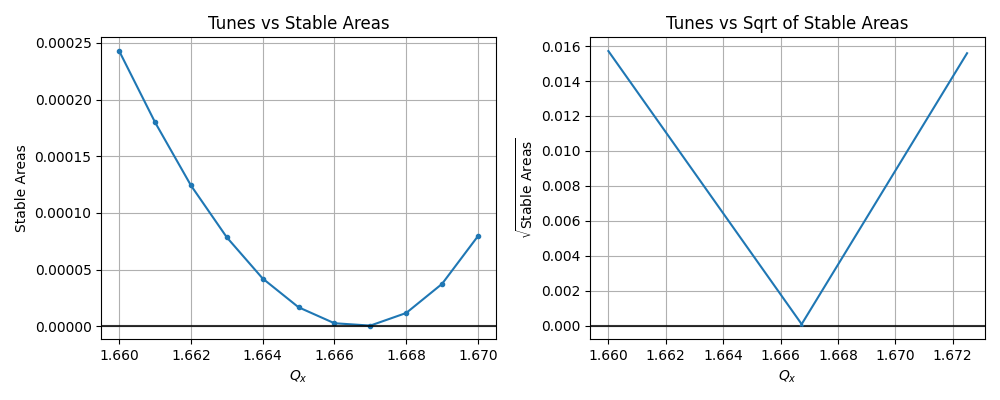

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(test_tunes, stable_areas, marker='.')
axs[0].set_xlabel(r'$Q_x$')
axs[0].set_ylabel('Stable Areas')
axs[0].set_title('Tunes vs Stable Areas')
axs[0].grid(True)
axs[0].axhline(y=0, color='k', alpha=0.8)

axs[1].set_xlabel(r'$Q_x$')
axs[1].set_ylabel(r'$\sqrt{\text{Stable Areas}}$')
axs[1].set_title('Tunes vs Sqrt of Stable Areas')
axs[1].grid(True)
axs[1].axhline(y=0, color='k', alpha=0.8)

# Create the extended lines (fitting)
x_plt1 = [1.660, polyres1]
axs[1].plot(x_plt1, np.polyval(poly_1, x_plt1), '-', color='#1f77b4')

x_plt2 = [polyres2, 1.6725]
axs[1].plot(x_plt2, np.polyval(poly_2, x_plt2), '-', color='#1f77b4')

plt.tight_layout()
plt.show()

### Show Data Table

In [8]:
import pandas as pd

df = pd.DataFrame({'Tunes' : test_tunes, 'Stable Areas': stable_areas, r'$\sqrt{\text{Stable Areas}}$': roots})
df

,Tunes,Stable Areas,$\sqrt{\text{Stable Areas}}$
0,1.660,2.427367e-04,0.015580
1,1.661,1.798863e-04,0.013412
2,1.662,1.242545e-04,0.011147
3,1.663,7.849990e-05,0.008860
4,1.664,4.221407e-05,0.006497
5,1.665,1.685949e-05,0.004106
6,1.666,2.788974e-06,0.001670
7,1.667,7.102057e-07,0.000843
8,1.668,1.181331e-05,0.003437
9,1.669,3.746817e-05,0.006121


In case we want to save the table in an excel file:
`df.to_excel('Steinbach.xlsx', index=False)`

                                             
Optimize - start penalty: 0.1           
Matching: model call n. 15               
Optimize - end penalty:  1.79331e-06


/home/aefstrat/miniforge3/lib/python3.12/site-packages/xtrack/twiss.py:3238: RuntimeWarning: invalid value encountered in divide
  pzeta = ctx2np(particles.ptau)[mask_at_ele]/ctx2np(particles.beta0)[mask_at_ele],


                                             
Optimize - start penalty: 0.009999      
Matching: model call n. 15               
Optimize - end penalty:  7.82611e-07
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  3.18407e-06
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  7.83867e-08
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  3.04528e-06
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  1.78024e-06
                                             
Optimize - start penalty: 0.01          
Matching: model call n. 15               
Optimize - end penalty:  3.42842e-06
    

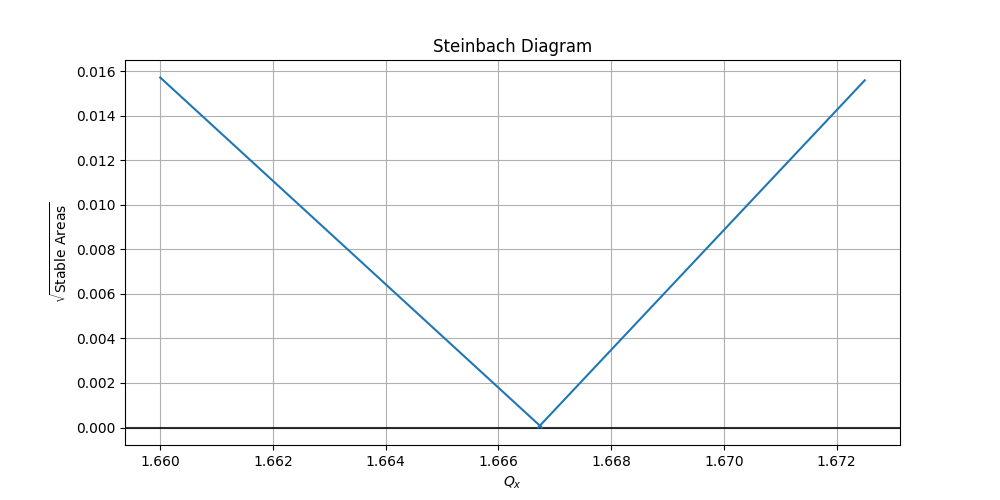

In [9]:
# Importing and testing as an external function
# The output is just a plot of the Steinbach diagram (fitted lines on the calculated stable areas for every tune value)
from steinbach import steinbach_plot
steinbach = steinbach_plot(line)